<h1 align="center"> Практична робота №3 </h1>
<h2 align="center"> <b> Класифікація даних методом опорних векторів </b> </h2>
<hr> <h3 align="center">Виконав студент групи ФБ-35 Куб'юк Дмитро </h3>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Вибрати з дз 3 два кластера з найбільшою кількістю елементів. (це кластери з номерами 0 та 2)

In [7]:
data = pd.read_csv("winequality_clustered.csv")
data_two_clusters = data[data["cluster"].isin([0, 2])]

scaler = StandardScaler()
X = data_two_clusters.drop(columns=["quality", "type", "cluster"])
X_scaled = scaler.fit_transform(X)

y = data_two_clusters["cluster"]

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,cluster
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1
1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
2,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,1
3,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,1
4,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red,1


Класифікувати методом опорних векторів.

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0, stratify=y)

svm = SVC(kernel='poly', degree=3, gamma='scale', C=1) # обрав поліноміальне ядро
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Точність класифікації: {acc:.3f}")

Точність класифікації: 0.953


Намалювати класи та розділяючу гіперлощину.

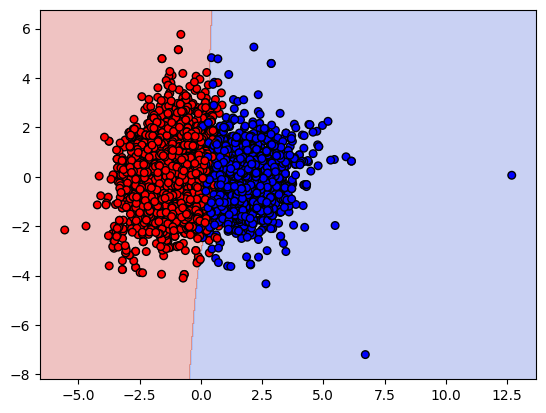

In [9]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr', edgecolors='k', s=30)
plt.show()